In [1]:
from Utilities.ExpModels import ArchModel, ARCH_TP
import numpy as np
from scipy.integrate import quad, dblquad
import matplotlib.pyplot as plt
import pickle

In [2]:
#Model and observed data.
model = ArchModel(-1,1, 0,1) 
theta1 = 0.3
theta2 = 0.3
x = model.GeneratorThetaGiven([theta1,theta2],1)[0]*10
# values at which to compute the posterior
theta1_values=np.linspace(-0.9,0.9 , 10)
theta2_values=np.linspace( 0.1,0.9 , 10)
xv,yv = np.meshgrid(theta1_values,theta2_values)
theta_vals = np.dstack((xv,yv))
theta_values = theta_vals.reshape(100,2)

In [3]:
with open('observedData.pickle', 'rb') as f:
     (generatingParameters,obsData) = pickle.load(f)
rel = obsData[16]*10

In [4]:
#Calculate true posterior
obj = ARCH_TP()
#post = obj.truePosterior(rel,theta_values)
obj.visualize(xv,yv,probabilities[16,3])

NameError: name 'probabilities' is not defined

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from Utilities.ExpModels import  ArchModel, ARCH_TP

model = ArchModel(-1,1, 0,1, 432) 

In [33]:
np.min(probabilities[:,3])

0.44697266965253885

In [5]:
with open('estimated_probabilities.pickle', 'rb') as f:
     (mu_values,estimated_probabilities)  = pickle.load(f)

#--------Run Evaluation -----------------------------------------------------------------------#
(probabilities,classifiers_test_scores) = estimated_probabilities
classifiers_test_scores = np.swapaxes(classifiers_test_scores,0,1)

kD_RBF =np.load('RBF_klDivergence.npy')
kD_SRBF =np.load('Standardized_RBF_klDivergence.npy')

kD_Four =np.load('Fourier_klDivergence.npy')
kD_SFour =np.load('Standardized_Fourier_klDivergence.npy')

In [3]:
classifiers_test_scores.shape
#RBF
#S_RBF
#Four
#S_Four

(4, 100)

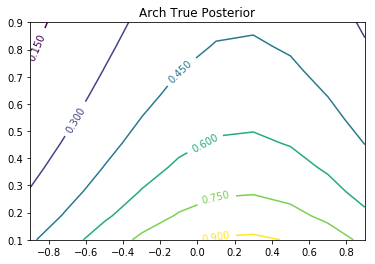

In [9]:
theta1_values=np.linspace(-0.9,0.9 , 10)
theta2_values=np.linspace( 0.1,0.9 , 10)
xv,yv = np.meshgrid(theta1_values,theta2_values)

post = np.load('TruePosterior.npy')[9]
obj = ARCH_TP()
obj.visualize(xv,yv,post)

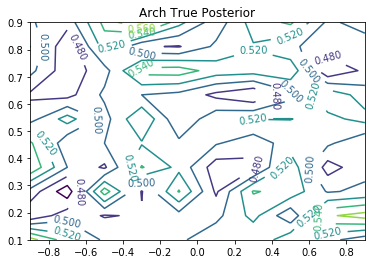

In [68]:
obj.visualize(xv,yv,probabilities[2,3])

In [12]:
a= np.percentile(theta2,5)
b =np.percentile(theta2,50)
c =np.percentile(theta2,75)
d = np.percentile(theta2,95)

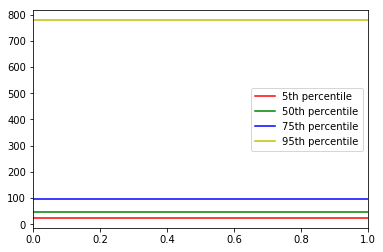

In [13]:
import matplotlib.pyplot as plt
plt.clf()
fig=plt.figure()
plt.axhline(y=a,color ='r')
plt.axhline(y=b,color ='g')
plt.axhline(y=c,color ='b')
plt.axhline(y=d,color ='y')
plt.legend(['5th percentile','50th percentile','75th percentile','95th percentile'])
plt.show()
fig.savefig('ARCHPolyAutoPercentiles_para2.pdf')

In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
import pickle
import matplotlib.pyplot as plt
with open('estimated_probabilities.pickle', 'rb') as f:
     (mu_values,estimated_probabilities)  = pickle.load(f)

#--------Run Evaluation -----------------------------------------------------------------------#
(probabilities,classifiers_test_scores) = estimated_probabilities

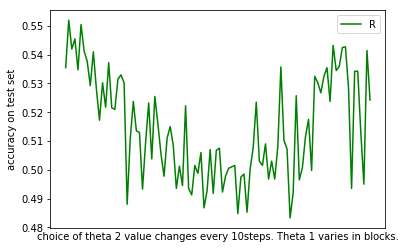

In [4]:
import pickle
import matplotlib.pyplot as plt
with open('estimated_probabilities.pickle', 'rb') as f:
     (mu_values,estimated_probabilities)  = pickle.load(f)

#--------Run Evaluation -----------------------------------------------------------------------#
(probabilities,classifiers_test_scores) = estimated_probabilities
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(classifiers_test_scores[:,1],'g-')
ax.legend('R')
ax.set_xticks([])
ax.set_xlabel('choice of theta 2 value changes every 10steps. Theta 1 varies in blocks.')
ax.set_ylabel('accuracy on test set')
plt.show()
fig.savefig('ARCHAccuracies.pdf')

In [5]:
mu_values[52]

array([-0.5       ,  0.54444444])

In [9]:
probabilities

array([[[ 0.62027715,  0.54717396,  0.55575133, ...,  0.52510081,
          0.50096896,  0.49794513],
        [ 0.62474142,  0.53645454,  0.55404823, ...,  0.52082172,
          0.51729373,  0.47707772]],

       [[ 0.54163026,  0.60926184,  0.47905982, ...,  0.549455  ,
          0.47435334,  0.52801843],
        [ 0.54288703,  0.60901325,  0.48152652, ...,  0.54774797,
          0.45281142,  0.53567335]],

       [[ 0.63633711,  0.62377075,  0.52395657, ...,  0.53339934,
          0.48656812,  0.45403737],
        [ 0.6317877 ,  0.63008164,  0.51517778, ...,  0.52875035,
          0.44184047,  0.47522352]],

       ..., 
       [[ 0.60400767,  0.66011453,  0.52645349, ...,  0.53833622,
          0.48184804,  0.50109008],
        [ 0.60505118,  0.65772602,  0.5229887 , ...,  0.53421503,
          0.45936135,  0.50521236]],

       [[ 0.51726231,  0.52974308,  0.42794765, ...,  0.55578199,
          0.47114645,  0.49553007],
        [ 0.51049322,  0.53623315,  0.42875013, ...,  0.55598

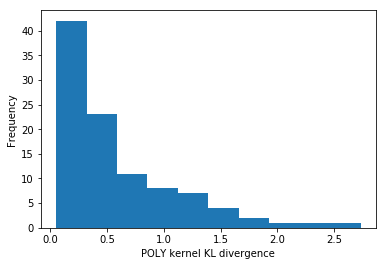

In [19]:
plt.clf()
fig =plt.figure()
ax =fig.add_subplot(111)
#density = gaussian_kde(delta)
xs = np.linspace(-10,10,50)
#ax.plot(xs,density(xs))
ax.hist(kD_SFour)
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[0],label ='POLY')
#ax.plot(np.linspace(-6,6,100),classifiers_test_scores[1],label='RBF')


#ax.vlines(0,0,1)
ax.set_xlabel('POLY kernel KL divergence')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()
fig.savefig('KD_GaussianRBF.pdf')

In [20]:
np.argmin(kD_Four)

56

In [22]:
kD_Four[56]

0.093491659565384452

In [8]:
probabilities.shape

(100, 4, 100)

In [33]:
probabilities[2,3]

array([ 0.5683794 ,  0.52881282,  0.49602072,  0.48426404,  0.49602257,
        0.51420101,  0.50200864,  0.53520225,  0.50604218,  0.48814591,
        0.46339135,  0.49206952,  0.47849114,  0.48232901,  0.49207059,
        0.49404023,  0.5267007 ,  0.48426053,  0.55708745,  0.56837646,
        0.49206525,  0.44697267,  0.55042592,  0.47848049,  0.5416736 ,
        0.47656675,  0.54167204,  0.5330619 ,  0.49801008,  0.50401626,
        0.55708124,  0.5       ,  0.47656708,  0.54167244,  0.51420117,
        0.46899803,  0.47466332,  0.53306204,  0.47087792,  0.49403554,
        0.54383906,  0.48426013,  0.5       ,  0.51832731,  0.50402147,
        0.50200975,  0.4881491 ,  0.51010611,  0.50401802,  0.48232249,
        0.49206011,  0.52881054,  0.49206996,  0.53950921,  0.48233065,
        0.51420206,  0.52040412,  0.52040338,  0.5141973 ,  0.52669121,
        0.47657192,  0.47276446,  0.50401901,  0.5       ,  0.49403905,
        0.47466296,  0.46154402,  0.49403898,  0.5352006 ,  0.51

In [37]:
probabilities[2,3].reshape((10,10))

array([[ 0.5683794 ,  0.52881282,  0.49602072,  0.48426404,  0.49602257,
         0.51420101,  0.50200864,  0.53520225,  0.50604218,  0.48814591],
       [ 0.46339135,  0.49206952,  0.47849114,  0.48232901,  0.49207059,
         0.49404023,  0.5267007 ,  0.48426053,  0.55708745,  0.56837646],
       [ 0.49206525,  0.44697267,  0.55042592,  0.47848049,  0.5416736 ,
         0.47656675,  0.54167204,  0.5330619 ,  0.49801008,  0.50401626],
       [ 0.55708124,  0.5       ,  0.47656708,  0.54167244,  0.51420117,
         0.46899803,  0.47466332,  0.53306204,  0.47087792,  0.49403554],
       [ 0.54383906,  0.48426013,  0.5       ,  0.51832731,  0.50402147,
         0.50200975,  0.4881491 ,  0.51010611,  0.50401802,  0.48232249],
       [ 0.49206011,  0.52881054,  0.49206996,  0.53950921,  0.48233065,
         0.51420206,  0.52040412,  0.52040338,  0.5141973 ,  0.52669121],
       [ 0.47657192,  0.47276446,  0.50401901,  0.5       ,  0.49403905,
         0.47466296,  0.46154402,  0.49403898

In [52]:
a = generatingParameters[np.argmin(np.abs(generatingParameters),0)]

In [49]:
b = a[np.argmin(np.abs(a))]

IndexError: index 594 is out of bounds for axis 0 with size 100

In [64]:
a = np.argmin(np.abs(generatingParameters),0)

In [63]:
np.argmin(generatingParameters,1)

array([87, 73])

In [66]:
generatingParameters[a[87],87]

0.62458467500424186

In [8]:
generatingParameters.T

array([[ 0.80732114,  0.1828963 ],
       [ 0.79202055,  0.56464104],
       [ 0.17990022,  0.01490411],
       [ 0.97454675,  0.18231195],
       [ 0.703207  ,  0.05905253],
       [-0.58236697,  0.64534853],
       [ 0.53324571,  0.08686704],
       [-0.93438873,  0.29020998],
       [-0.40650796,  0.73783168],
       [ 0.14071918,  0.12579631],
       [ 0.66933708,  0.08606967],
       [-0.67854069,  0.24386717],
       [-0.30317772,  0.49609937],
       [-0.93821882,  0.34265128],
       [ 0.97270622,  0.67782284],
       [ 0.00295302,  0.86980396],
       [-0.12441126,  0.52703663],
       [ 0.30539971,  0.50989919],
       [-0.0580227 ,  0.30343654],
       [ 0.89696105,  0.95609013],
       [ 0.17567709,  0.05747802],
       [-0.9592962 ,  0.46909294],
       [ 0.63535407,  0.07892577],
       [ 0.95437804,  0.74924985],
       [-0.64531877,  0.23336837],
       [ 0.69978907,  0.94725452],
       [ 0.81327586,  0.53410254],
       [ 0.3991656 ,  0.69604543],
       [ 0.43459435,

In [12]:
np.max(probabilities[:,3])

0.584597287498972

In [6]:
probabilities[16,3]

(100,)

In [20]:
xv[:,3:]

array([[-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9],
       [-0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9]])

In [6]:
a = np.linspace(-1,1,5)
b = np.linspace(0,0.5,5)

x,y = np.meshgrid(a,b)

In [20]:
res = np.vstack([x.flatten(),y.flatten()]).T

In [25]:
res[0]

array([-1.,  0.])

In [4]:
x=3
y='s'
z=str(x)+y

In [1]:
import pickle

In [8]:
with open('choicesRBFKernelQ' + str(z) + '.pickle', 'wb') as f:
    pickle.dump(4, f)

In [2]:
with open('observedData.pickle','rb') as f:
    obsdata = pickle.load(f)


In [3]:
with open('y_t.pickle','rb') as f:
    y = pickle.load(f)


In [20]:
(a,b) =y

In [21]:
a.shape

(2, 100)

In [22]:
b.shape

(100, 1)

In [23]:
b

array([[ 0.2033828 ],
       [-0.84244145],
       [ 0.73631913],
       [ 0.72667523],
       [ 0.57408717],
       [ 0.21457509],
       [ 0.40498621],
       [-0.18751358],
       [-0.63886317],
       [ 0.83586516],
       [-1.3001871 ],
       [ 0.70796019],
       [ 0.29471553],
       [-0.2875431 ],
       [ 0.18799942],
       [ 0.48456923],
       [ 0.77465036],
       [-0.4616975 ],
       [-0.7307648 ],
       [ 0.31170693],
       [-0.86456795],
       [-0.18731863],
       [-0.15682031],
       [-0.4156006 ],
       [ 1.49282938],
       [-0.18013838],
       [-0.83597959],
       [ 0.1972371 ],
       [-0.22647679],
       [-0.72255388],
       [-0.346176  ],
       [-0.08376265],
       [ 0.65118966],
       [-0.11573818],
       [ 0.06121622],
       [-0.79723705],
       [ 0.42187817],
       [ 0.09307482],
       [-0.21699966],
       [-0.2381901 ],
       [-0.07153538],
       [ 0.13192362],
       [-0.27419684],
       [-0.78959858],
       [ 0.42352256],
       [-0